# Obtención y analisis de los datos

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/miranda-amanda/Airbnb_Rio_de_Janeiro/refs/heads/main/listings_Rio_de_Janeiro.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,279.0,5,324,2024-09-08,1.87,1,281,22,NaN
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,245.0,2,299,2024-09-21,1.72,1,205,29,NaN
2,35764,COPACABANA SEA BREEZE - RIO - 25 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,207.0,3,487,2024-09-16,2.86,1,67,41,NaN
3,48305,Bright 6bed Penthouse Seconds from Beach,70933,Goitaca,NaN,Ipanema,-22.98591,-43.20302,Entire home/apt,2278.0,7,179,2024-09-02,1.08,6,323,27,NaN
4,48901,Extra large 4BD 3BT on the AtlanticAve. Copaca...,222884,Marcio,NaN,Copacabana,-22.96574,-43.17514,Entire home/apt,736.0,2,33,2024-08-06,0.30,1,330,13,NaN


In [ ]:
# Seleccionando la columna "id" como clave
df.set_index('id', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36967 entries, 17878 to 1251637878591744614
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            36967 non-null  object 
 1   host_id                         36967 non-null  int64  
 2   host_name                       36967 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   36967 non-null  object 
 5   latitude                        36967 non-null  float64
 6   longitude                       36967 non-null  float64
 7   room_type                       36967 non-null  object 
 8   price                           35223 non-null  float64
 9   minimum_nights                  36967 non-null  int64  
 10  number_of_reviews               36967 non-null  int64  
 11  last_review                     28036 non-null  object 
 12  reviews_per_month  

In [ ]:
df.isnull().sum()

,0
name,0
host_id,0
host_name,0
neighbourhood_group,36967
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,1744
minimum_nights,0


In [ ]:
reviews_equal_zero = df[df['number_of_reviews'] == 0]
print(reviews_equal_zero.shape[0])

8931


La falta valores de los códigos `license` y `neighbourhood_group` no interferirá en la analisis. Sin embargo, la cantidad de valores nulos en la variable `last_review` (8931) puede indicar que el inmueble nunca fue evaluado, ya que la variable `number_of_reviews_ltm` no tiene entradas nulas. Esto también puede ser analizado en la variable reviews_per_month, que tiene el mismo número de valores nulos. Al contar cuántas evaluaciones son iguales a cero, obtenemos el mismo número (8931), lo que indica que esos inmuebles no recibieron ninguna evaluación (review).

In [ ]:
# Reemplazar los valores nulos con 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
# Transformar la serie 'reviews_per_month' a tipo entero
df['reviews_per_month'] = df['reviews_per_month'].astype(int)

Por último, tenemos la variable `price` con 1744 valores faltantes. El precio de la diaria es una de las variables más importantes en este tipo de conjunto de datos. Por tratarse de una pequeña proporción de datos nulos (4,7%), podríamos optar por ignorar esos datos. Sin embargo, realizaremos una imputación basada en grupos con el objetivo de crear una imputación más realista. Consideramos que los precios varían significativamente entre grupos (por barrios o tipos de habitación).

In [ ]:
df['price'] = df.groupby(['neighbourhood', 'room_type'])['price'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Verificar la cantidad de datos nulos y los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36967 entries, 17878 to 1251637878591744614
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            36967 non-null  object 
 1   host_id                         36967 non-null  int64  
 2   host_name                       36967 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   36967 non-null  object 
 5   latitude                        36967 non-null  float64
 6   longitude                       36967 non-null  float64
 7   room_type                       36967 non-null  object 
 8   price                           36966 non-null  float64
 9   minimum_nights                  36967 non-null  int64  
 10  number_of_reviews               36967 non-null  int64  
 11  last_review                     28036 non-null  object 
 12  reviews_per_month  

In [ ]:
# Visualizar las métricas estadísticas del DataFrame
df.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,3.696700e+04,0.0,36967.000000,36967.000000,36966.00000,36967.000000,36967.000000,36967.000000,36967.000000,36967.000000,36967.000000,0.0
mean,2.042965e+08,NaN,-22.967466,-43.252250,712.27432,3.582682,22.671599,0.580869,9.480158,197.691752,7.730733,NaN
std,1.943403e+08,NaN,0.035028,0.101677,5342.97015,13.827012,44.719163,1.087424,25.056353,121.599559,12.062592,NaN
min,3.607000e+03,NaN,-23.073050,-43.723009,33.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,2.915676e+07,NaN,-22.984640,-43.315140,207.50000,1.000000,1.000000,0.000000,1.000000,89.000000,0.000000,NaN
50%,1.194300e+08,NaN,-22.972830,-43.194930,323.00000,2.000000,5.000000,0.000000,2.000000,179.000000,2.000000,NaN
75%,3.793040e+08,NaN,-22.956319,-43.185584,586.00000,3.000000,24.000000,1.000000,5.000000,327.000000,10.000000,NaN
max,6.533333e+08,NaN,-22.749950,-43.104400,624838.00000,1000.000000,693.000000,13.000000,209.000000,365.000000,124.000000,NaN


## Varibles **minimum_nights, reviews_per_month e number_of_reviews_ltm**

La variable `minimum_nights` tiene algunas entradas con valores muy elevados, con un máximo de 1.000 noches.

In [ ]:
print(f'Número de registros com minimum_nights > 90: {sum(df["minimum_nights"] > 90)}')

Número de registros com minimum_nights > 90: 73


Adoptaremos un límite máximo más razonable, como 90 noches, para asegurarnos de que las entradas sean coherentes con las expectativas de los usuarios en una plataforma como Airbnb. Dado que hay solo 73 entradas con más de 90 días como mínimo de noches, las excluiremos de nuestro análisis para garantizar que los datos sean coherentes con las expectativas para una plataforma como Airbnb.

In [ ]:
# Excluir entradas con minimum_nights mayor que 90
df = df[df['minimum_nights'] <= 90]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

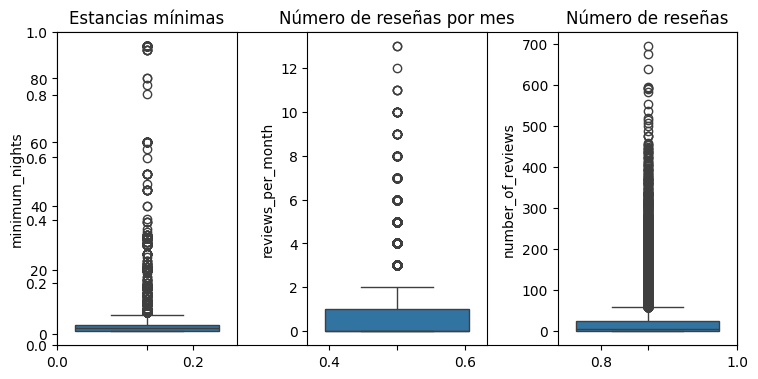

In [ ]:
fig, axes = plt.subplots(figsize=(8,4))

# Boxplot para minimum_nights
plt.subplot(1, 3, 1)
sns.boxplot(data=df['minimum_nights'])
plt.title('Estancias mínimas')

# Boxplot para reviews_per_month
plt.subplot(1, 3, 2)
sns.boxplot(data=df['reviews_per_month'])
plt.title('Número de reseñas por mes')

# Boxplot para number_of_reviews
plt.subplot(1, 3, 3)
sns.boxplot(data=df['number_of_reviews'])
plt.title('Número de reseñas')

plt.tight_layout()
plt.show()

#Analizando la variable **precio**.

En `df.describe()`, podemos observar que la variable price tiene un valor promedio de 712,27 reales y un valor medio de 5342,97 reales. Los valores máximos y mínimos se desvían significativamente de sus métricas centrales: 33 y 624.838,00 reales. Utilizaremos la regla del Rango Intercuartílico (IQR, por sus siglas en inglés) para establecer límites a los valores atípicos. La regla del IQR define como límite inferior la diferencia entre el primer cuartil y 1,5 * (la diferencia entre el tercer y primer cuartil). Como límite superior, se establece la suma del tercer cuartil con 1,5 * (la diferencia entre el tercer y primer cuartil).

In [ ]:
# Verificando las entradas con outliers de 'price', según la regla del IQR Score:
# La regla del IQR define como límite inferior la diferencia entre el primer cuartil y 1,5 * (la diferencia entre el tercer y el primer cuartil).
# Y como límite superior la suma del tercer cuartil con 1,5 * (la diferencia entre el tercer y el primer cuartil).

# Identificando los cuartiles:
q1 = df.price.quantile(.25)
q3 = df.price.quantile(.75)
IQR_price = q3 - q1
print('IQR de la variable price: ', IQR_price)

# Definiendo los límites inferior y superior
sup_price = q3 + 1.5 * IQR_price
inf_price = q1 - 1.5 * IQR_price

print('Límite superior de price: ', sup_price)
print('Límite inferior de price: ', inf_price)



IQR de la variable price:  378.5
Límite superior de price:  1153.75
Límite inferior de price:  -360.25


In [ ]:
# Tratamiento de los outliers:
df_clean = df[(df['price'] >= inf_price) & (df['price'] <= sup_price)]

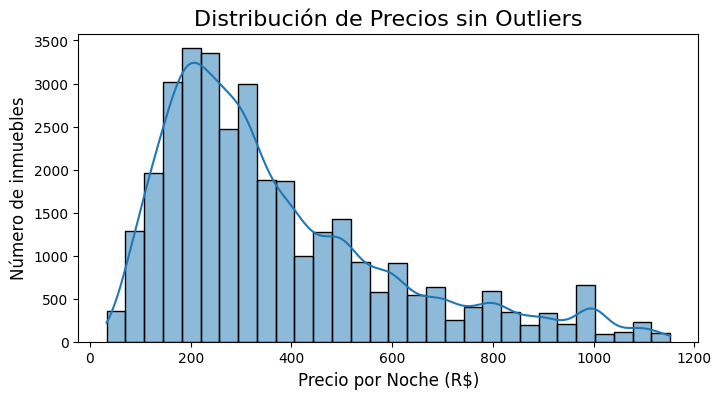

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_clean['price'], bins=30, kde=True)
plt.title('Distribución de Precios sin Outliers', fontsize=16)
plt.xlabel('Precio por Noche (R$)', fontsize=12)
plt.ylabel('Número de inmuebles', fontsize=12)
plt.show()

El grafico representa la distribuición de los precios sin outliers para los inmuebles de Airbnb en Rio de Janeiro. El gráfico presenta una asimetría positiva, con una cola alargada hacia la derecha, típico en variables de precios. La mayor concencetración de precios se encuentra entre 200 y 400 reales, como era de esperarse, mientras que los valores más altos (cercanos al límite superior de 1153,75) son menos frecuentes.

La eliminación de los valores atípicos mejoró la visualización de la distribución, haciendo los datos más representativos para el análisis. La línea de densidad superpuesta muestra el comportamiento general de la variable `price`, confirmando la cola larga.

In [ ]:
print("Antes del tratamiento:")
print(df['price'].describe())

print("\nDespués del tratamiento:")
print(df_clean['price'].describe())


Antes del tratamiento:
count     36893.000000
mean        710.118925
std        5339.336388
min          33.000000
25%         207.500000
50%         322.000000
75%         586.000000
max      624838.000000
Name: price, dtype: float64

Después del tratamiento:
count    33397.000000
mean       371.601386
std        234.462483
min         33.000000
25%        200.000000
50%        300.000000
75%        490.000000
max       1152.000000
Name: price, dtype: float64


**Resumen de las Estadísticas:**
Antes del tratamiento, el promedio estaba fuertemente influenciado por los valores extremos (valores atípicos). La enorme variabilidad de la desviación estándar antes refleja la presencia de precios muy por encima del promedio (como el máximo de R$624.838). Este valor es un valor atípico extremo y no representa el mercado.

Después del tratamiento, el promedio se encuentra alineado con las métricas centrales (mediana y cuartiles), representando mejor el mercado. La reducción en la desviación estándar indica que los precios están más concentrados alrededor del promedio, sin la distorsión de valores atípicos. El valor máximo de 1.152 reales corresponde al límite superior definido por el IQR y se encuentra dentro del rango razonable para precios de hospedaje. Los valores de los cuartiles (25%, 50%, 75%) ahora son más consistentes con el mercado, lo que sugiere que los precios generalmente varían entre 200 y 490 reales, con una mediana de 300 reales.

El tratamiento de los valores atípicos hizo que los datos fueran más representativos, evitando la distorsión de las métricas por valores extremos. La reducción en la desviación estándar y en el promedio refleja la exclusión de propiedades con precios anormalmente altos.

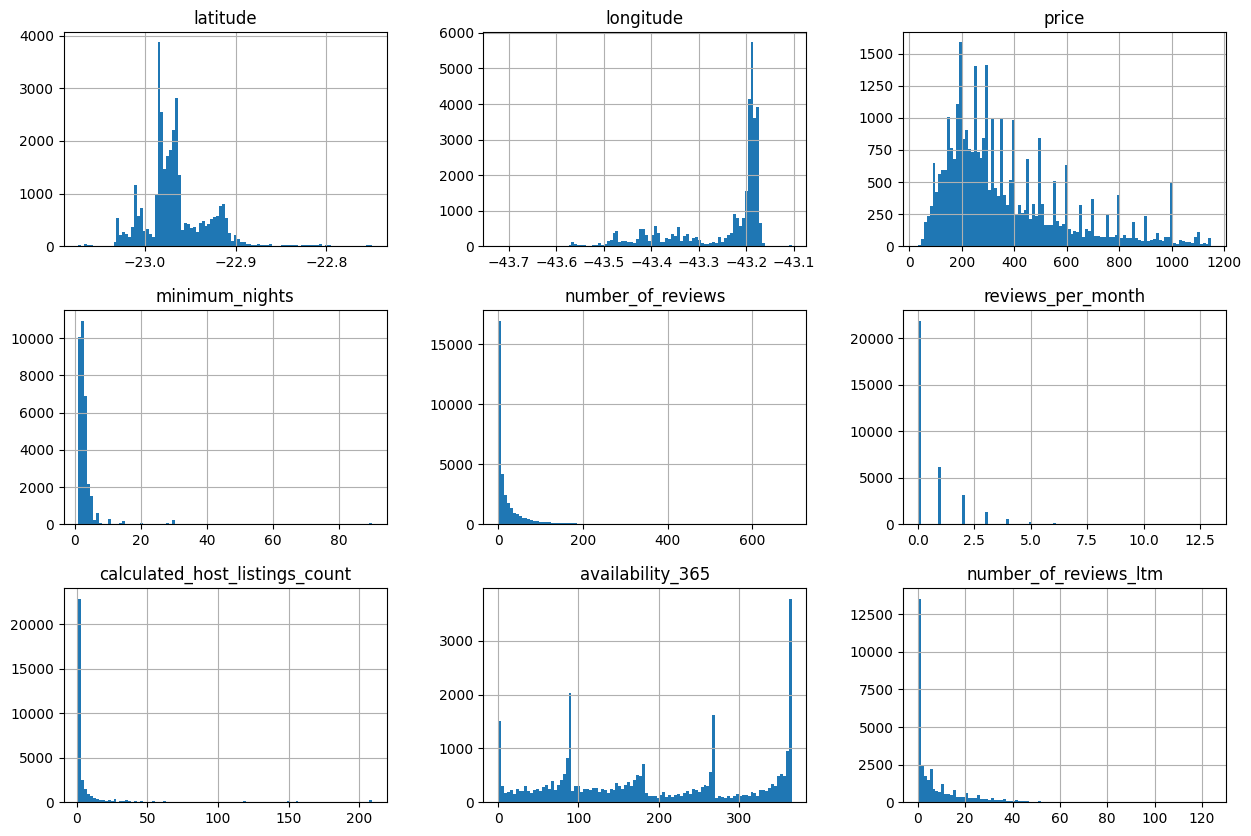

In [ ]:
#Histograma de las variables numéricas:

histogramas = df_clean.drop(columns=['host_id', 'neighbourhood_group', 'license'])
histogramas.hist(bins=100, figsize=(15,10));


Las distribuciones de la **latitud y longitud** indican que las propiedades están concentradas en áreas geográficas específicas, con poca variación.

Después del tratamiento, la variable **precio** muestra una distribución asimétrica positiva, con mayor frecuencia en precios más bajos (entre 100 y 400 reales). Esto es consistente con el hecho de que la mayoría de los anuncios tienen precios accesibles.

La mayoría de las propiedades tiene **estancias mínimas** muy cortas, menor que 5 días. La cola larga indica que algunos anuncios tienen estancias mínimas mucho más altas.

La mayoría de los anuncios recibió pocas **reseñas** (concentradas entre 0 y 10). La cola larga muestra que algunas propiedades tienen cientos de reseñas. Además, la mayoría de las propiedades tienen pocas **reseñas mensuales**, con la mayor frecuencia cerca de 0.

La mayoría de los anfitriones tienen pocas propiedades listadas (valores bajos). Algunos pocos anfitriones tienen un gran número de propiedades, lo que puede indicar empresas disponibilizando inmuebles o inversores de imuebles.

La variable de disponibilidad muestra picos en 0, 180 y 365 días, lo que indica propiedades no disponibles, disponibles por medio tiempo o disponibles todo el año.

Similar al número de reseñas, la variable "número de reseñas del último año" presenta una concentración en valores bajos (de 0 a 20 reseñas en el último año).

In [ ]:
# Definiendo la matriz de correlación
corr = df_clean[['price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']].corr()

display(corr);

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.064240,-0.120086,-0.172315,0.099978,0.084270,-0.168863
minimum_nights,0.064240,1.000000,-0.040039,-0.105540,-0.028938,-0.014482,-0.089894
number_of_reviews,-0.120086,-0.040039,1.000000,0.445124,-0.020883,-0.120440,0.686367
reviews_per_month,-0.172315,-0.105540,0.445124,1.000000,0.017326,-0.129577,0.741256
calculated_host_listings_count,0.099978,-0.028938,-0.020883,0.017326,1.000000,0.063500,0.010069
availability_365,0.084270,-0.014482,-0.120440,-0.129577,0.063500,1.000000,-0.159927
number_of_reviews_ltm,-0.168863,-0.089894,0.686367,0.741256,0.010069,-0.159927,1.000000


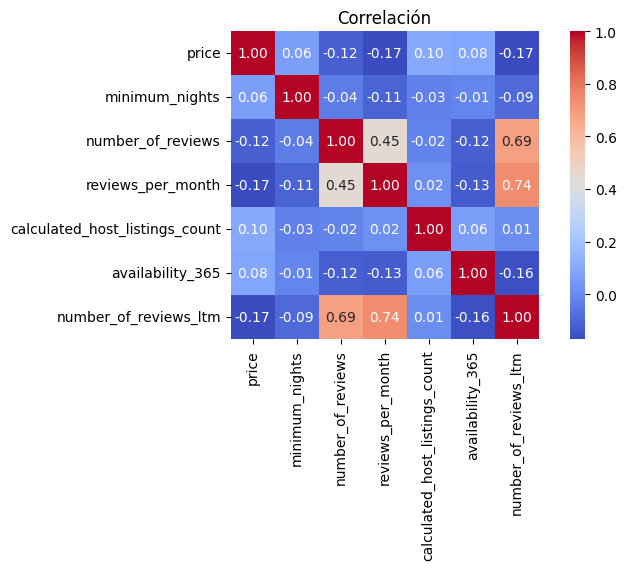

In [ ]:
# Heatmap para una mejor visualización de las correlaciones
plt.figure(figsize=(8,4))
plt.title('Correlación')
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', square=True, linecolor='white', annot=True);

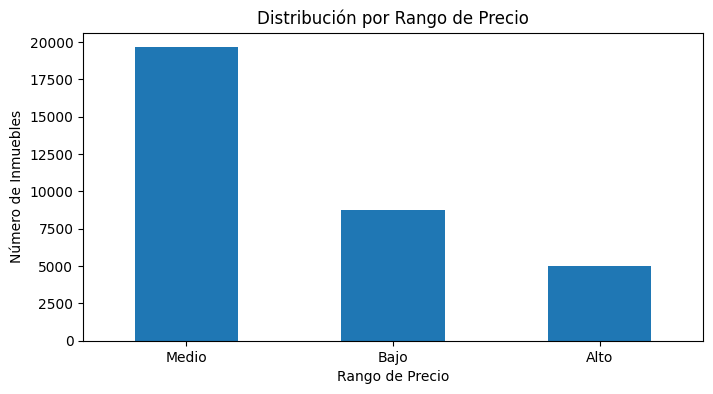

In [ ]:
df_clean = df_clean.copy()

plt.figure(figsize=(8, 4))
bins = [0, 200, 600, 1153.75]
labels = ['Bajo', 'Medio', 'Alto']
df_clean['price_category'] = pd.cut(df_clean['price'], bins=bins, labels=labels)

df_clean['price_category'].value_counts().plot(kind='bar')
plt.title('Distribución por Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Número de Inmuebles')
plt.xticks(rotation=0)
plt.show()

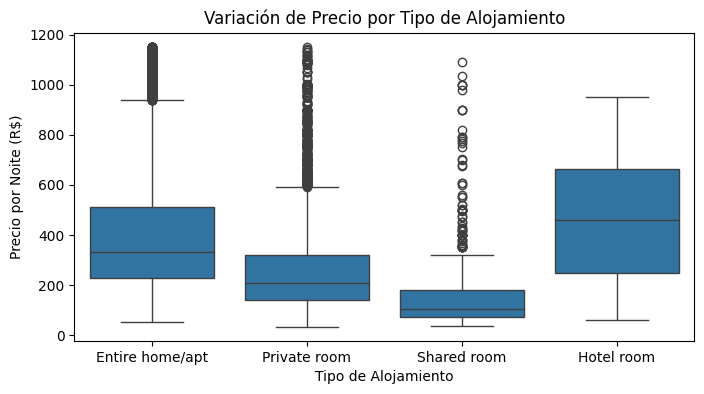

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_clean, x='room_type', y='price')
plt.title("Variación de Precio por Tipo de Alojamiento")
plt.xlabel("Tipo de Alojamiento")
plt.ylabel("Precio por Noite (R$)")
plt.show()

In [ ]:
# Visualizando inicialmente la cantidad de cada tipo de inmueble y su porcentaje en relación con el dataset:
df_clean.room_type.value_counts()/df_clean.shape[0]


,count
room_type,
Entire home/apt,0.770908
Private room,0.210139
Shared room,0.018175
Hotel room,0.000779


La mayor parte del conjunto de datos se concentra en alojamientos completos (casas/departamentos) y habitaciones privadas. En cambio, las habitaciones compartidas y las habitaciones de hotel representan aproximadamente solo el 1 % del total.

Precio promedio por tipo de alojamiento:
room_type
Hotel room         476.288462
Entire home/apt    404.787579
Private room       267.327729
Shared room        165.108731
Name: price, dtype: float64


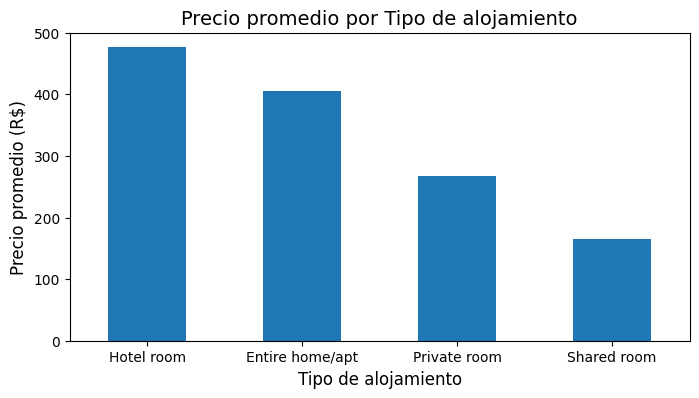

In [ ]:
# Agrupar el precio promedio por tipo de alojamiento
price_by_room_type = df_clean.groupby('room_type')['price'].mean().sort_values(ascending=False)
print("Precio promedio por tipo de alojamiento:")
print(price_by_room_type)

# Visualizar en gráfico de barras
price_by_room_type.plot(kind='bar', figsize=(8, 4))
plt.title('Precio promedio por Tipo de alojamiento', fontsize=14)
plt.xlabel('Tipo de alojamiento', fontsize=12)
plt.ylabel('Precio promedio (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


Los alojamientos más caros son los hoteles y las casas/departamentos enteros, mientras que los más económicos son las habitaciones compartidas. Las habitaciones privadas presentan un precio inferior al de las habitaciones de hotel.

In [ ]:
#Cantidad de inmuebles por barrio:
df_clean.neighbourhood.value_counts().sort_values(ascending=False)

,count
neighbourhood,
Copacabana,10474
Barra da Tijuca,2929
Ipanema,2905
Recreio dos Bandeirantes,1723
Jacarepaguá,1644
...,...
Deodoro,1
Parada de Lucas,1
Cidade Universitária,1


Es posible afirmar que la mayoría de los alojamientos se encuentran en los barrios de Copacabana, Barra da Tijuca e Ipanema.

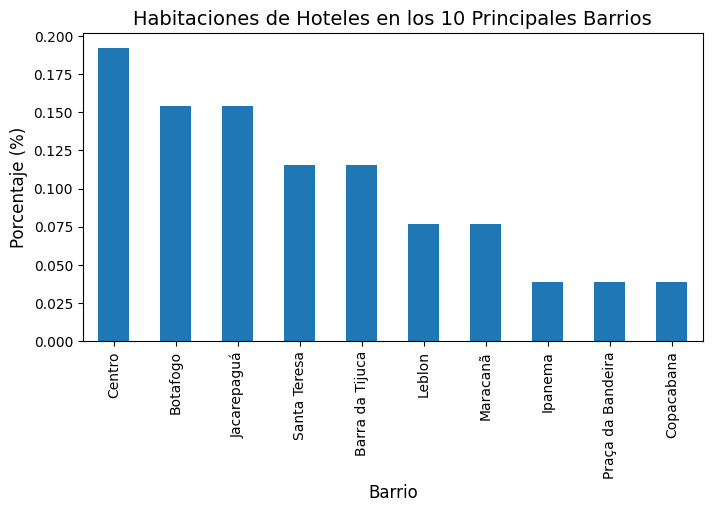

In [ ]:
# Top 10 barrios con mayor cantidad de inmuebles "hotel room"
hotel_room = df_clean[df_clean['room_type'] == 'Hotel room']
hotel_room_dist = hotel_room['neighbourhood'].value_counts(normalize=True).head(10)

hotel_room_dist.plot(kind='bar', figsize=(8, 4))
plt.title('Habitaciones de Hoteles en los 10 Principales Barrios', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=90)
plt.show()


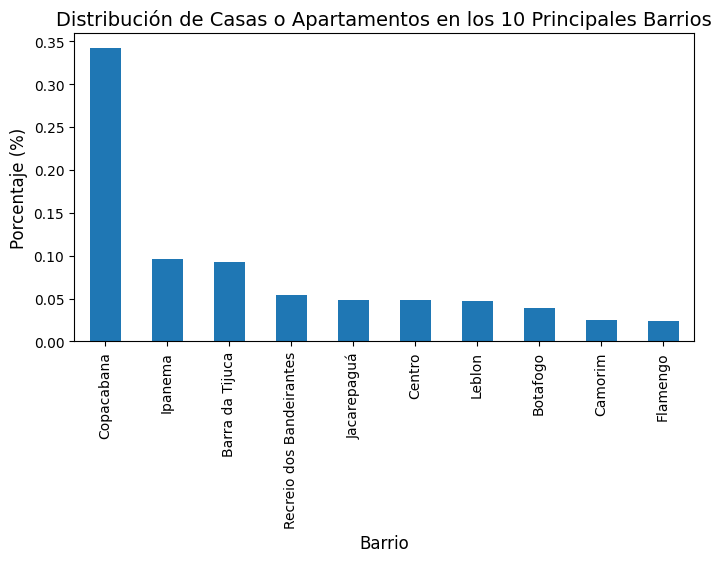

In [ ]:
# Top 10 barrios con mayor cantidad de inmuebles "Entire home/apt"
entirehomeapt_room = df_clean[df_clean['room_type'] == 'Entire home/apt']
entirehomeapt_room_dist = entirehomeapt_room['neighbourhood'].value_counts(normalize=True).head(10)

entirehomeapt_room_dist.plot(kind='bar', figsize=(8, 4))
plt.title('Distribución de Casas o Apartamentos en los 10 Principales Barrios', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

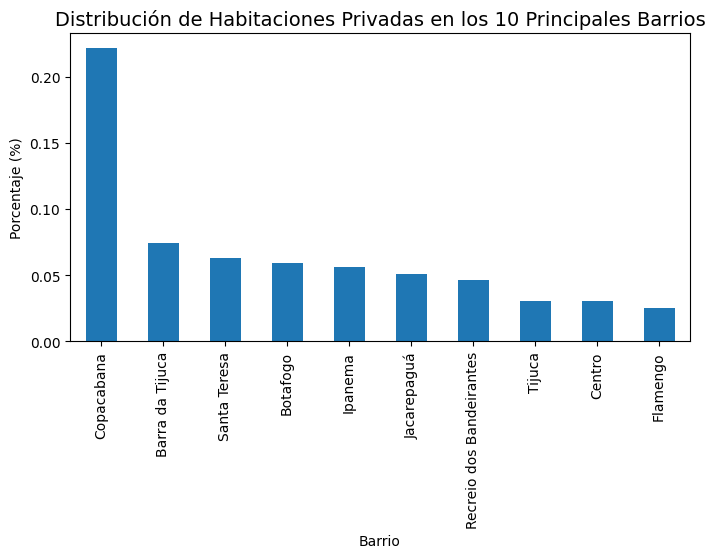

In [ ]:
# Top 10 barrios con mayor cantidad de inmuebles "Private room"
private_room = df_clean[df_clean['room_type'] == 'Private room']
private_room_dist = private_room['neighbourhood'].value_counts(normalize=True).head(10)

private_room_dist.plot(kind='bar', figsize=(8, 4))
plt.title('Distribución de Habitaciones Privadas en los 10 Principales Barrios', fontsize=14)
plt.xlabel('Barrio')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90)
plt.show()

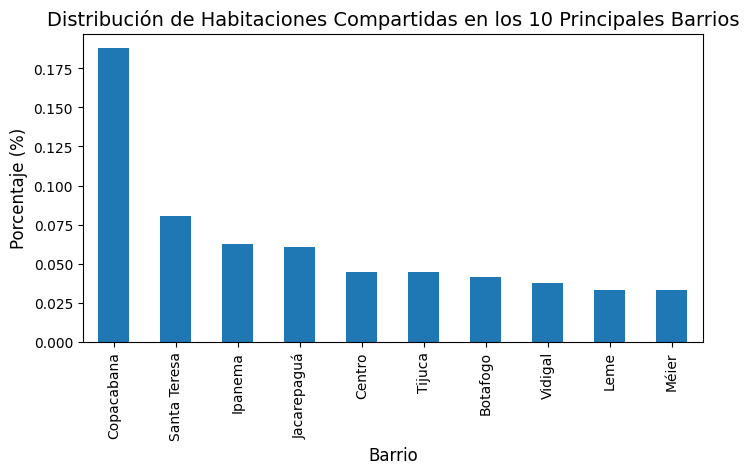

In [ ]:
# Top 10 barrios con mayor cantidad de inmuebles "Shared room"
shared_room = df_clean[df_clean['room_type'] == 'Shared room']
shared_room_dist = shared_room['neighbourhood'].value_counts(normalize=True).head(10)

shared_room_dist.plot(kind='bar', figsize=(8, 4))
plt.title('Distribución de Habitaciones Compartidas en los 10 Principales Barrios', fontsize=14)
plt.xlabel('Barrio', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Inicialmente, verifiquemos la media de precio para cada barrio:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

,price
neighbourhood,
Praia da Bandeira,600.000000
São Conrado,556.418327
Leblon,535.525298
Joá,509.512821
Lagoa,507.069948
...,...
Jardim América,93.000000
Manguinhos,91.500000
Cidade Universitária,90.000000


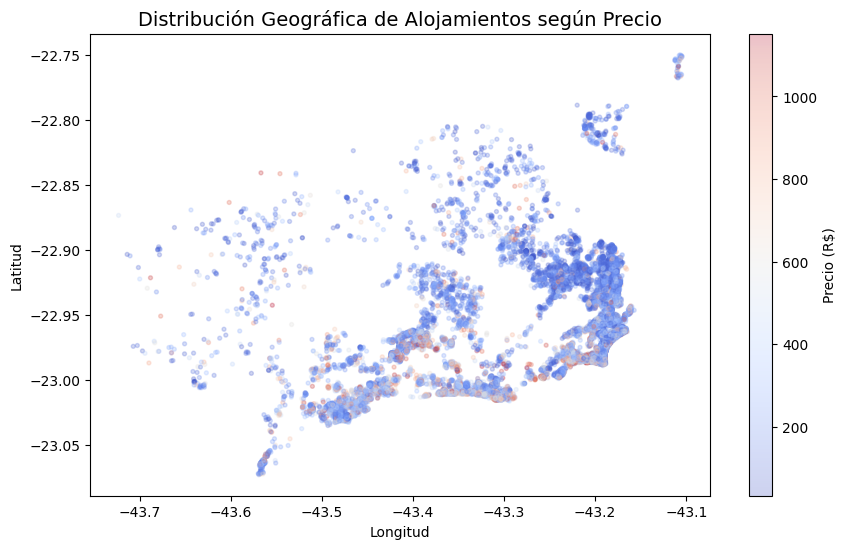

In [ ]:
#Inmuebles por latitud y longitud:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=df_clean['longitude'], y=df_clean['latitude'], c=df_clean['price'], cmap='coolwarm', alpha=0.25, s=8)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de Alojamientos según Precio', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Precio (R$)')
plt.show()

Bairro Latitude Longitude

Copacabana	-22.96599	-43.17940

In [ ]:
expensive = df_clean[df_clean.price > 800]
expensive.neighbourhood.value_counts().sort_values(ascending=False)/expensive.shape[0]

,count
neighbourhood,
Copacabana,0.241189
Ipanema,0.161359
Barra da Tijuca,0.129512
Leblon,0.085775
Jacarepaguá,0.067941
...,...
Vasco da Gama,0.000425
Méier,0.000425
Bonsucesso,0.000425


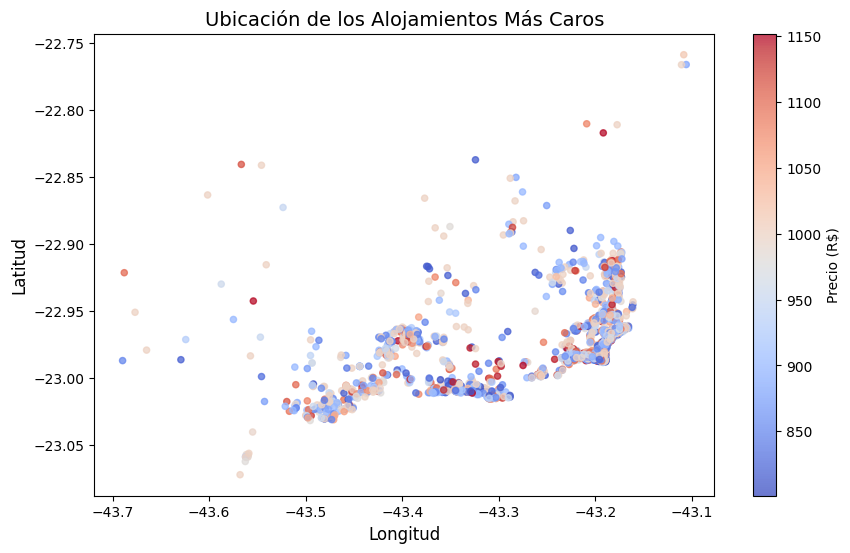

In [ ]:
# Trazando las coordenadas de los alojamientos más caros:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=expensive['longitude'], y=expensive['latitude'], c=expensive['price'], cmap='coolwarm', alpha=0.75, s=20)

plt.title('Ubicación de los Alojamientos Más Caros', fontsize=14)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
cbar = plt.colorbar(scatter)
cbar.set_label('Precio (R$)')
plt.show()

Para que tengamos una idea de a qué barrio nos referimos al tratar de latitud y longitud, agrupamos por la mayor cantidad de inmuebles disponibles en los barrios, con sus respectivas latitudes y longitudes.

In [ ]:
# Agrupar por barrio y contar la cantidad de inmuebles, latitud y longitud
top_neigh_by_price = (df_clean.groupby('neighbourhood').agg({'price': 'count', 'latitude': 'mean','longitude': 'mean'})
    .sort_values(by='price', ascending=False).head(10).reset_index())
print(top_neigh_by_price)

              neighbourhood  price   latitude  longitude
0                Copacabana  10474 -22.972486 -43.186238
1           Barra da Tijuca   2929 -23.005927 -43.349367
2                   Ipanema   2905 -22.984270 -43.200951
3  Recreio dos Bandeirantes   1723 -23.021760 -43.473175
4               Jacarepaguá   1644 -22.968428 -43.395291
5                    Centro   1478 -22.910643 -43.182443
6                  Botafogo   1453 -22.950588 -43.184452
7                    Leblon   1344 -22.983311 -43.222894
8              Santa Teresa   1039 -22.920552 -43.186843
9                  Flamengo    796 -22.934088 -43.175969


##Relación entre el Precio y la cantidad mínima de noches requeridas para alquilar

In [ ]:
mean_price_5night = df_clean[df_clean.minimum_nights <= 10]
mean_price_5night['price'].dropna().mean()

np.float64(370.1180342927128)

El valor promedio de 370.12 para alojamientos con estadía mínima de hasta 10 días sugiere que los inmuebles de corta estadía tienden a tener un precio más accesible o más competitivo, posiblemente porque son más buscados por turistas o personas que viajan por trabajo.

In [ ]:
# Verificando la media del precio de la diaria que requieren una estancia mínima entre 25 y 35 días:
mean_price_30night = df_clean[df_clean.minimum_nights<=35]
mean_price_30night = mean_price_30night[mean_price_30night.minimum_nights>25]
mean_price_30night.price.mean()

np.float64(416.2467105263158)

El valor de 416.25 para estadías más largas sugiere que los inmuebles con una estadía mínima entre 25 y 35 días tienden a tener un precio más alto.

##Relación entre precio y reseñas

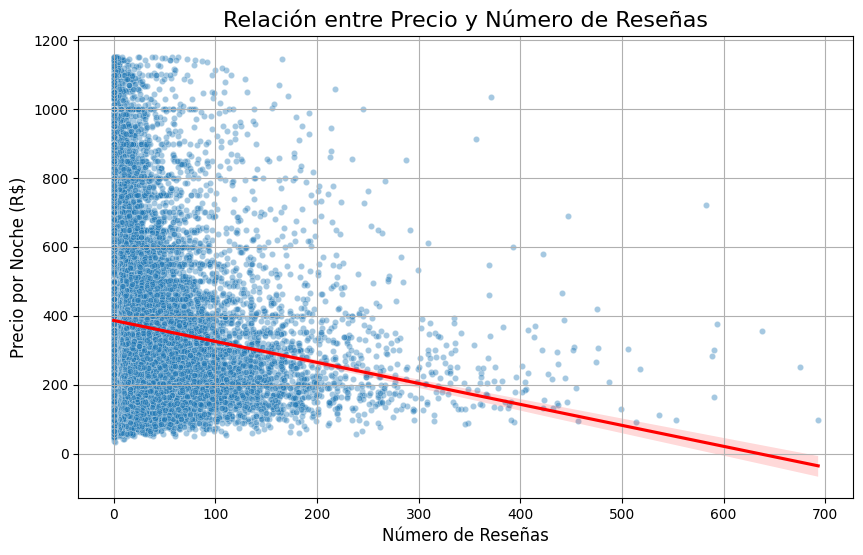

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='number_of_reviews', y='price', alpha=0.4, s=20)
sns.regplot(data=df_clean, x='number_of_reviews', y='price', scatter=False, color='red')

plt.title('Relación entre Precio y Número de Reseñas', fontsize=16)
plt.xlabel('Número de Reseñas', fontsize=12)
plt.ylabel('Precio por Noche (R$)', fontsize=12)
plt.grid(True)
plt.show()

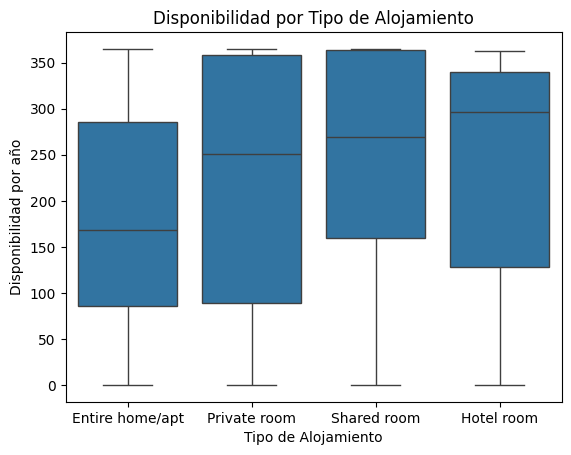

In [ ]:
sns.boxplot(x='room_type', y='availability_365', data=df_clean)
plt.title("Disponibilidad por Tipo de Alojamiento")
plt.xlabel("Tipo de Alojamiento")
plt.ylabel("Disponibilidad por año")
plt.show()

##Comparando Disponibilidad vs. Precio Promedio


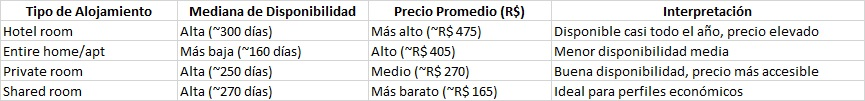

A partir de la comparación entre la disponibilidad de los alojamientos y su precio promedio, es posible observar que las habitaciones de hotel son las más caras y también las más disponibles, lo que refuerza su perfil de operación profesional. Las casas o apartamentos enteros tienen una disponibilidad media menor, lo que puede indicar que tengan una alta tasa de ocupación, lo que agota rápidamente las fechas disponibles, o bien, el anfitrión restringe intencionalmente los días disponibles, ya sea por uso personal o como parte de una estrategia. Las habitaciones privadas representan una buena alternativa: tienen una alta presencia en la plataforma, con un precio más accesible y buena disponibilidad. Las habitaciones compartidas son poco comunes, pero resultan ser las más accesibles y con buena disponibilidad.

In [ ]:
bins = [0, 90, 180, 270, 365]
labels = ['0-90 dias', '91-180 dias', '181-270 dias', '271-365 dias']

In [ ]:
df_clean = df_clean.copy()
df_clean['availability_range'] = pd.cut(df_clean['availability_365'], bins=bins, labels=labels, right=True)

In [ ]:
avg_reviews_by_avail = df_clean.groupby('availability_range', observed=True)['number_of_reviews'].mean().sort_values(ascending=False)
print(avg_reviews_by_avail)

availability_range
91-180 dias     32.083847
0-90 dias       27.315421
181-270 dias    20.774921
271-365 dias    18.224585
Name: number_of_reviews, dtype: float64


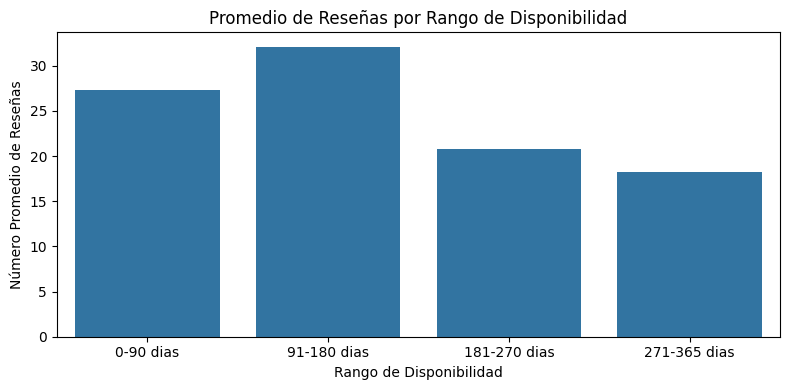

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=avg_reviews_by_avail.index, y=avg_reviews_by_avail.values)
plt.title("Promedio de Reseñas por Rango de Disponibilidad")
plt.xlabel("Rango de Disponibilidad")
plt.ylabel("Número Promedio de Reseñas")
plt.tight_layout()
plt.show()

Los alojamientos con disponibilidad entre 91 y 180 días son, en promedio, los que acumulan más evaluaciones. Curiosamente, aquellos con mayor disponibilidad (181 a 365 días) presentan menos evaluaciones, lo que contradice la idea de que estar más tiempo disponible implica ser más alquilado.

Las propiedades con menor disponibilidad (hasta 180 días) parecen tener una mayor rotación y ocupación. Una posible interpretación es que estar más disponible no necesariamente significa ser más atractivo para los huéspedes —podría deberse a precios elevados, ubicación menos deseada o menor calidad del alojamiento.

En cambio, aquellos alojamientos con menos días disponibles pero muchas evaluaciones sugieren una alta demanda.


##Relación entre precio y disponibilidad.

In [ ]:
bins = [0, 90, 180, 270, 365]
labels = ['0-90 días', '91-180 días', '181-270 días', '271-365 días']

In [ ]:
df_clean = df_clean.copy()
df_clean['availability_range'] = pd.cut(df_clean['availability_365'], bins=bins, labels=labels, right=True)

In [ ]:
avg_price_by_avail = df_clean.groupby('availability_range', observed=True)['price'].mean().sort_index()
print(avg_price_by_avail)

availability_range
0-90 días       354.709020
91-180 días     357.892731
181-270 días    375.253690
271-365 días    398.246836
Name: price, dtype: float64


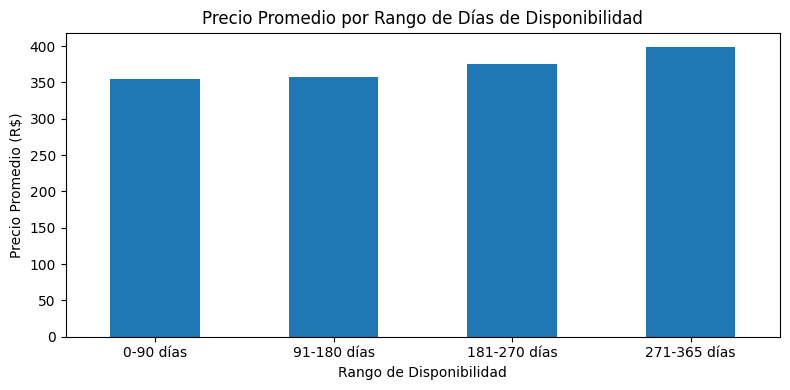

In [ ]:
plt.figure(figsize=(8, 4))
avg_price_by_avail.plot(kind='bar')
plt.title('Precio Promedio por Rango de Días de Disponibilidad')
plt.xlabel('Rango de Disponibilidad')
plt.ylabel('Precio Promedio (R$)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

 Se observa una tendencia creciente: a medida que los alojamientos están disponibles por más días, el precio promedio también aumenta. Aquellos con disponibilidad de 271 a 365 días presentan el precio más alto, cercano a 400 reales, mientras que los alojamientos con disponibilidad limitada a 0-90 días tienen el precio promedio más bajo, alrededor de 350.

 Es posible que propiedades más disponibles durante todo el año tengan mejores valoraciones o sean propiedades mejor equipadas, lo que les permite cobrar más. Importante: mejores valoraciones no es lo mismo que la cantidad de valoraciones, que es lo que se analizó en el gráfico anterior.

#Conclusión


Este proyecto de análisis exploratorio del mercado de alojamientos de Airbnb en Río de Janeiro buscó obtener insights importantes sobre el comportamiento de los precios, la dinámica de las reseñas y la disponibilidad de los inmuebles en esta ciudad brasileña, super turística y reconocida a nivel mundial. A continuación, algunas conclusiones según los objetivos planteados:

1. Distribución de precios según el tipo de habitación y la ubicación
Los precios presentan una distribución asimétrica positiva, con la mayoría de las propiedades concentradas entre 200 y 400 reales por noche. Fueron eliminados los valores atípicos para una observasión más realista del mercado. Se evidenció que tanto el tipo de habitación como el barrio influyen significativamente en el precio. Al observar la variable precio en relación con el tipo de alojamiento, notamos que las habitaciones de hotel son las más caras, mientras que las habitaciones privadas y compartidas son las opciones más económicas. Los departamentos o casas enteras tienen un precio elevado, aunque son más económicos que los hoteles. Esto podría explicar la menor disponibilidad promedio anual de este tipo de alojamiento, ya que, aunque las habitaciones privadas y compartidas sean más baratas, suelen ser opciones buscadas por un público específico, como mochileros. Barrios turísticos o centrales tienden a tener precios más elevados, como el barrio de Copacabana. La mayoría de los alojamientos también se encuentran en este barrio, excepto los hoteles, que están más presentes en el centro de la ciudad.

2. Relación entre el número de reseñas y el precio
La mayoría de los inmuebles tiene pocas reseñas, y se identificó una ligera correlación negativa entre el número de reseñas y el precio. Esto puede indicar que alojamientos más económicos tienden a recibir más evaluaciones, posiblemente por tener mayor rotación de huéspedes. Sin embargo, la correlación no es lo suficientemente fuerte como para establecer una relación causal directa.

3. Factores que afectan la disponibilidad de los inmuebles
La variable `availability_365` mostró picos en 0, 180 y 365 días, indicando distintos perfiles de uso: propiedades no disponibles, de uso parcial o totalmente disponibles durante el año. Además, se observó que la disponibilidad se relaciona moderadamente con el número de reseñas recientes. Los alojamientos con un mayor número de reseñas tienden a estar menos disponibles para alquilar en la plataforma a lo largo del año, lo que podría sugerir una mayor ocupación y rotación de huéspedes.

El análisis de los datos de Airbnb en Río de Janeiro permitió identificar patrones importantes en cuanto a precios, tipo de alojamiento y disponibilidad. Estos hallazgos pueden ser útiles para  los anfitriones optimizaren sus anuncios, así como para potenciales huéspedes interesados en comprender mejor el comportamiento del mercado local. Futuras investigaciones podrían incorporar variables temporales (como eventos locales o temporadas altas) para enriquecer aún más la comprensión del mercado del Airbnb en la cuidad de Rio de Janerio.